<a href="https://colab.research.google.com/github/Jonathan-Chia/portfolio/blob/main/time_series/forecasting_bitcoin_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Bitcoin Prices using Deep Learning Time Series

Practicing Deep Learning Time Series Forecasting on BitCoin Data

From ZeroToMastery Tensorflow Course

In [ ]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-3d431c8e-89fd-3326-713b-0dfee7b92355)


## Get Data

Download all historical data from here: https://www.coindesk.com/price/bitcoin/

In [ ]:
## Import time series data with pandas
import pandas as pd

df = pd.read_csv('/content/BTC_USD_2014-11-04_2021-10-25-CoinDesk.csv',
                 parse_dates=['Date'],
                 index_col=["Date"]) # put date as index
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2014-11-04,BTC,324.71833,331.60083,332.75133,323.06333
2014-11-05,BTC,332.45666,324.71833,335.81166,320.93333
2014-11-06,BTC,336.58500,332.45666,341.49000,328.56166
2014-11-07,BTC,346.77500,336.58500,351.57500,336.02833
2014-11-08,BTC,344.81166,346.77500,351.29500,339.86000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2548 entries, 2014-11-04 to 2021-10-25
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2548 non-null   object 
 1   Closing Price (USD)  2548 non-null   float64
 2   24h Open (USD)       2548 non-null   float64
 3   24h High (USD)       2548 non-null   float64
 4   24h Low (USD)        2548 non-null   float64
dtypes: float64(4), object(1)
memory usage: 119.4+ KB


In [ ]:
# How many samples
len(df)

2548

In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-10-21,BTC,62603.575070,65986.244921,66635.466408,62290.325376
2021-10-22,BTC,60689.238265,62192.232903,63717.168947,60033.928038
2021-10-23,BTC,61124.347126,60692.609117,61733.585205,59694.050434
2021-10-24,BTC,60936.150851,61304.790355,61490.095150,59553.027885
2021-10-25,BTC,63004.381115,60860.032655,63661.925180,60656.561825


Note: we have 2548 rows, but generally deep learning models need a lot more data to be effective

Smaller sample size is a problem that is common to time series problems

> **Note:** Seasonality = number of samples per year. This data has a seasonality of 365

## Important Time series patterns

**Trend:** time series has a clear long term increase/decrease

**Seasonal:** time of year / day of week / season / etc.

**Cyclic:** has no fixed time frame

In [ ]:
# Only want closing price
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2014-11-04,324.71833
2014-11-05,332.45666
2014-11-06,336.58500
2014-11-07,346.77500
2014-11-08,344.81166


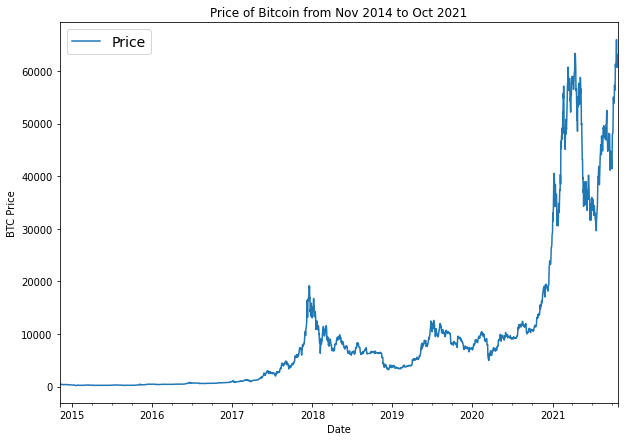

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from Nov 2014 to Oct 2021")
plt.legend(fontsize=14);

## Importing time series data with Python's CLV module

In [ ]:
# Importing and formatting historical bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
prices = []

with open("/content/BTC_USD_2014-11-04_2021-10-25-CoinDesk.csv", 'r') as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # will skip first row
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates not strings
    prices.append(float(line[2])) # get closing price as float

# View first 10 of each
timesteps[:10], prices[:10]

([datetime.datetime(2014, 11, 4, 0, 0),
  datetime.datetime(2014, 11, 5, 0, 0),
  datetime.datetime(2014, 11, 6, 0, 0),
  datetime.datetime(2014, 11, 7, 0, 0),
  datetime.datetime(2014, 11, 8, 0, 0),
  datetime.datetime(2014, 11, 9, 0, 0),
  datetime.datetime(2014, 11, 10, 0, 0),
  datetime.datetime(2014, 11, 11, 0, 0),
  datetime.datetime(2014, 11, 12, 0, 0),
  datetime.datetime(2014, 11, 13, 0, 0)],
 [324.71833,
  332.45666,
  336.585,
  346.775,
  344.81166,
  343.065,
  358.50166,
  368.07666,
  376.99666,
  442.10666])

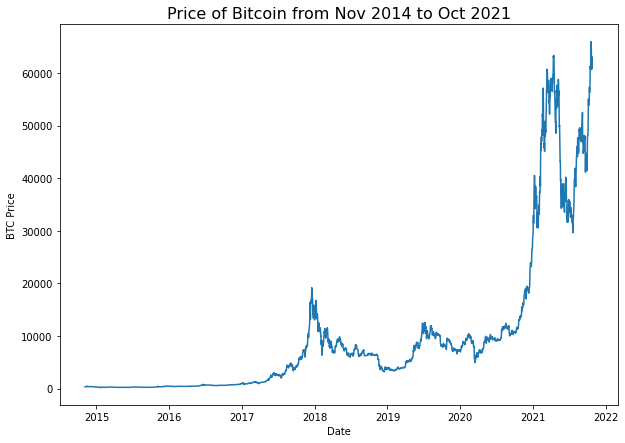

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, prices)
plt.title("Price of Bitcoin from Nov 2014 to Oct 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

## Creating train test splits

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2038, 510, 2038, 510)

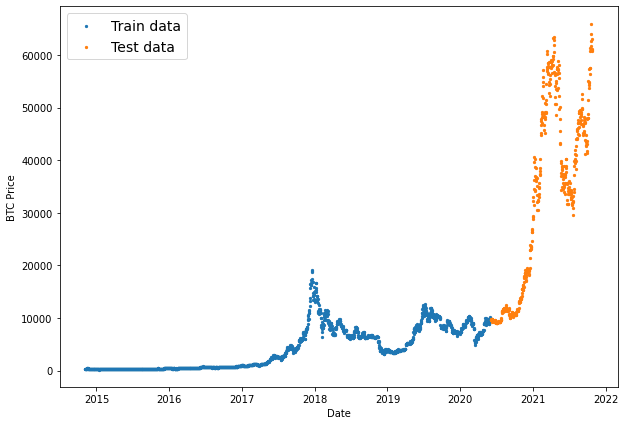

In [ ]:
# Plot train test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

Side note: This article is fun read about differences in time series compared to regular machine learning

https://towardsdatascience.com/3-facts-about-time-series-forecasting-that-surprise-experienced-machine-learning-practitioners-69c18ee89387

## Create a plotting function

In [ ]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps against values

  Parameters
  ---------
  timesteps: array of timestep values
  values: array of values across time
  format: style of plot, default = scatter
  start: where to start the plot
  end: where to end the plot
  label: label to show on plot about values
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

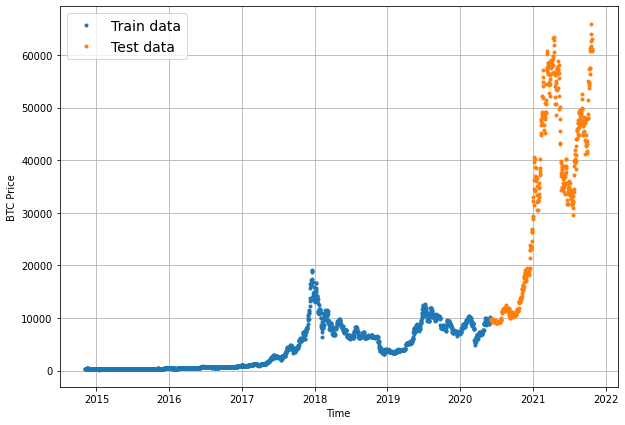

In [ ]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

0: Naive

1: Dense, horizon = 1, window = 7

2: Dense, horizon = 1, window = 30

3: Dense, horizon = 7, window = 30

4: Conv1D, 1 7

5: LSTM 1 7

6: Dense but multivariate

7: N-BEATs 1 7

8: Ensemble

9: Future prediction

10: Silly model

# Model 0: Naive Forecast

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

The prediction at time `t` will be equal to previous timestep at time `t-1`

In [ ]:
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

([9667.0607542595,
  9811.367094602,
  9659.6612981892,
  9677.0509945125,
  9737.458558786,
  9791.9278997681,
  9786.1420204782,
  9874.967047524,
  9260.8326409877,
  9464.2280968215],
 [61273.805275885,
  60744.9849380446,
  60965.4654336171,
  61707.4813118213,
  63901.0730802098,
  65972.8631297649,
  62603.5750699116,
  60689.2382648626,
  61124.3471256221,
  60936.1508514192])

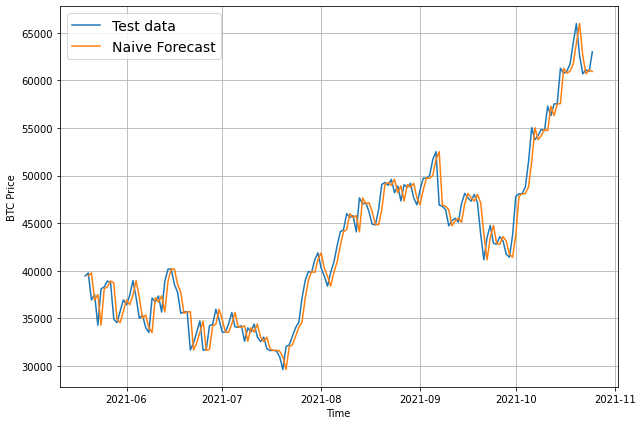

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10,7))
#plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test,start=350,format='-', label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format='-', label='Naive Forecast')

## Review: Different Evaluation Metrics

Regression problem so can use regression metrics:

* MAE - interpretable - forecasts lead to median
* RMSE - interpretable - forecasts lead to mean
* MASE - comparing model's performance to naive forecast
* MAPE - percentage errors can be dangerous if y=0

Essentially looking for this: how do our model's forecast compare against actual values?

See this link: https://otexts.com/fpp3/accuracy.html


In [ ]:
import tensorflow as tf

# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:
# Put all eval metrics into a function
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
               y_pred=naive_forecast)
naive_results

{'mae': 924.30414,
 'mape': 2.6047938,
 'mase': 0.99834156,
 'mse': 2055079.2,
 'rmse': 1433.5548}

In [ ]:
tf.reduce_min(y_test), tf.reduce_mean(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float32, numpy=9022.153>,
 <tf.Tensor: shape=(), dtype=float32, numpy=32127.76>,
 <tf.Tensor: shape=(), dtype=float32, numpy=65972.86>)

We can guess how the model is doing by looking at where the majority of values are

For example, if most values are closer to 60k, then an error of 1000 is not that bad

## Side note: Other models we could use

This notebook is focused on tensorflow, but maybe for future work can use those and compare to the final best tensorflow model

Moving average	https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/

ARIMA (Autoregression Integrated Moving Average)	https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

sktime (Scikit-Learn for time series)	https://github.com/alan-turing-institute/sktime

TensorFlow Decision Forests (random forest, gradient boosting trees)	https://www.tensorflow.org/decision_forests

Facebook Kats (purpose-built forecasting and time series analysis library by Facebook)	https://github.com/facebookresearch/Kats

LinkedIn Greykite (flexible, intuitive and fast forecasts)	https://github.com/linkedin/greykite

# Windowing our Time Series

We window to turn our data into a supervised learning problem

In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [ ]:
# Create function to label windowed data

def get_labelled_window(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset

  If horizon=1
  input: [0,1,2,3,4,5,6,7] -> output: ([0,1,2,3,4,5,6], [7]) 
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


Great let's now use this basic function to iterate through all the data

For loops would take a while so we will use numpy array indexing: https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

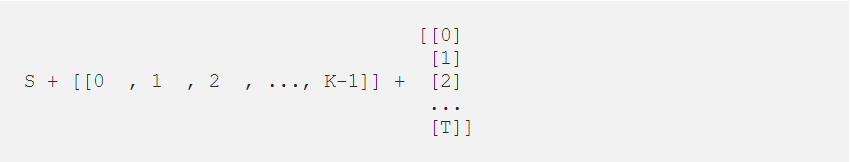

In [ ]:
np.arange(4)

array([0, 1, 2, 3])

In [ ]:
np.expand_dims(np.arange(4), axis=0)

array([[0, 1, 2, 3]])

In [ ]:
np.expand_dims(np.arange(4), axis=0).T

array([[0],
       [1],
       [2],
       [3]])

In [ ]:
# Simple example of the above matrix addition
np.expand_dims(np.arange(4), axis=0).T + np.expand_dims(np.arange(8), axis=0)

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10]])

In [ ]:
import numpy as np
# Create function to view NumPy arrays as windows copying the blogpost
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. This is array 1
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0) 
  # print(f"Window step:\n {window_step}")

  # 2. Add horizontal array and vertical array together
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # this is the vertical array [[0],[1],[2],...,[T]]
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  
  # 4. Get the labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(np.array(prices), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2541, 2541)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [324.71833 332.45666 336.585   346.775   344.81166 343.065   358.50166] -> Label: [368.07666]
Window: [332.45666 336.585   346.775   344.81166 343.065   358.50166 368.07666] -> Label: [376.99666]
Window: [336.585   346.775   344.81166 343.065   358.50166 368.07666 376.99666] -> Label: [442.10666]


## Turning windows into training and test sets

In [ ]:
full_windows[:5], full_labels[:5]

(array([[324.71833, 332.45666, 336.585  , 346.775  , 344.81166, 343.065  ,
         358.50166],
        [332.45666, 336.585  , 346.775  , 344.81166, 343.065  , 358.50166,
         368.07666],
        [336.585  , 346.775  , 344.81166, 343.065  , 358.50166, 368.07666,
         376.99666],
        [346.775  , 344.81166, 343.065  , 358.50166, 368.07666, 376.99666,
         442.10666],
        [344.81166, 343.065  , 358.50166, 368.07666, 376.99666, 442.10666,
         389.00333]]), array([[368.07666],
        [376.99666],
        [442.10666],
        [389.00333],
        [394.92666]]))

In [ ]:
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits
  """
  split_size = int(len(windows) * (1-test_split)) # will default to 0.8 train
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]

  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2032, 509, 2032, 509)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[324.71833, 332.45666, 336.585  , 346.775  , 344.81166, 343.065  ,
         358.50166],
        [332.45666, 336.585  , 346.775  , 344.81166, 343.065  , 358.50166,
         368.07666],
        [336.585  , 346.775  , 344.81166, 343.065  , 358.50166, 368.07666,
         376.99666],
        [346.775  , 344.81166, 343.065  , 358.50166, 368.07666, 376.99666,
         442.10666],
        [344.81166, 343.065  , 358.50166, 368.07666, 376.99666, 442.10666,
         389.00333]]), array([[368.07666],
        [376.99666],
        [442.10666],
        [389.00333],
        [394.92666]]))

In [ ]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), np.array(y_train[WINDOW_SIZE:-1]))

True

## Modeling Checkpoint

We want to compare the best performance/epoch of each model

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

# Model 1: Dense 1, 7

* Single dense layer with 128 and relu
* Output layer with linear activation (no activation)
* Adam and MAE
* Batch size 128 (data is pretty small so can do bigger batches)
* 100 epochs

Could tune the hyperparameters but that could be an extension for later

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

# Create model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation='relu'),
  layers.Dense(HORIZON)
], name='model_1_dense')

# Compile
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', "mse"])

# Fit the model

history_1 = model_1.fit(x=train_windows,
                        y=train_labels,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
16/16 [==============================] - 4s 78ms/step - loss: 1052.2838 - mae: 1052.2838 - mse: 3281413.0000 - val_loss: 4038.3960 - val_mae: 4038.3960 - val_mse: 27835144.0000
Epoch 2/100
16/16 [==============================] - 1s 47ms/step - loss: 370.0820 - mae: 370.0820 - mse: 441171.4688 - val_loss: 2101.2781 - val_mae: 2101.2781 - val_mse: 8439465.0000
Epoch 3/100
16/16 [==============================] - 1s 44ms/step - loss: 248.8695 - mae: 248.8695 - mse: 246683.7969 - val_loss: 1932.4431 - val_mae: 1932.4431 - val_mse: 7341109.5000
Epoch 4/100
16/16 [==============================] - 1s 46ms/step - loss: 236.8721 - mae: 236.8721 - mse: 219932.3750 - val_loss: 1686.6390 - val_mae: 1686.6390 - val_mse: 6009384.0000
Epoch 5/100
16/16 [==============================] - 1s 51ms/step - loss: 228.8478 - mae: 228.8478 - mse: 211895.9531 - val_loss: 1581.4629 - val_mae: 1581.4629 - val_mse: 5512004.0000
Epoch 6/100
16/16 [==============================] - 1s 47ms/step - los

In [ ]:
naive_results

{'mae': 924.30414,
 'mape': 2.6047938,
 'mase': 0.99834156,
 'mse': 2055079.2,
 'rmse': 1433.5548}

### Evaluate

In [ ]:
# Evaluate 
model_1.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 3ms/step - loss: 1119.3231 - mae: 1119.3231 - mse: 2611163.5000


[1119.3231201171875, 1119.3231201171875, 2611163.5]

In [ ]:
# Load in best performing model
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 3ms/step - loss: 933.0836 - mae: 933.0836 - mse: 2106266.2500


[933.0836181640625, 933.0836181640625, 2106266.25]

### Forecast on the test dataset

In [ ]:
pred_1 = model_1.predict(x = test_windows)

In [ ]:
len(test_labels), len(pred_1)

(509, 509)

In [ ]:
tf.keras.metrics.mean_absolute_error(tf.squeeze(test_labels), tf.squeeze(pred_1))

<tf.Tensor: shape=(), dtype=float32, numpy=933.08374>

In [ ]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=tf.squeeze(pred_1))
model_1_results

{'mae': 933.08374,
 'mape': 2.6302116,
 'mase': 1.0078244,
 'mse': 2106266.2,
 'rmse': 1451.2981}

In [ ]:
test_windows.shape

(509, 7)

In [ ]:
len(test_labels)

509

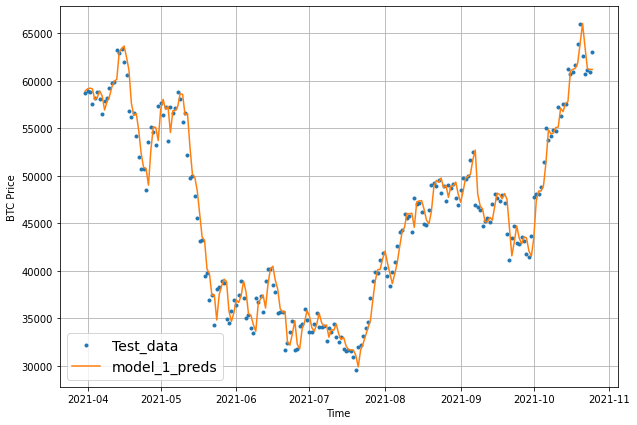

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[1:], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[1:], values=pred_1, start=offset, format="-", label="model_1_preds")

In [ ]:
def make_preds(model, input_data):
  """
  make predictions and squeeze results
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

# Model 2: Dense 30, 1

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
# Make windowed data
full_windows, full_labels = make_windows(np.array(prices), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2518, 2518)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2014, 504, 2014, 504)

In [ ]:
train_windows[:1], train_labels[:1]

(array([[324.71833, 332.45666, 336.585  , 346.775  , 344.81166, 343.065  ,
         358.50166, 368.07666, 376.99666, 442.10666, 389.00333, 394.92666,
         377.08   , 400.47166, 384.93   , 375.83333, 376.16   , 348.565  ,
         352.42   , 356.8    , 367.83   , 381.20666, 375.498  , 372.819  ,
         368.983  , 375.44   , 376.851  , 376.13218, 377.862  , 382.452  ]]),
 array([[376.382]]))

In [ ]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation='relu'),
  layers.Dense(HORIZON)
], name='model_2_dense')

model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_2.fit(train_windows, train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

## Evaluate

In [ ]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 3ms/step - loss: 990.3993 - mae: 990.3993


[990.3992919921875, 990.3992919921875]

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_2_preds)
model_2_results

{'mae': 990.3992,
 'mape': 2.788899,
 'mase': 1.059855,
 'mse': 2314995.8,
 'rmse': 1521.511}

Didn't perform as well as model 1 - could totally run a for loop with different window sizes

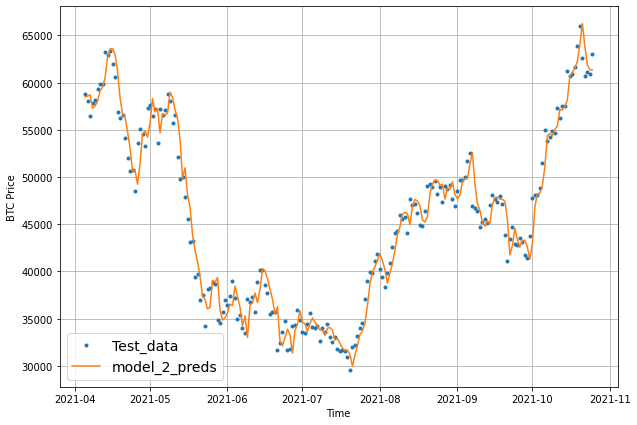

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

# Model 3: Dense 30, 7

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

In [ ]:
# Make windowed data
full_windows, full_labels = make_windows(np.array(prices), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2512, 2512)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2009, 503, 2009, 503)

In [ ]:
train_windows[:1], train_labels[:1]

(array([[324.71833, 332.45666, 336.585  , 346.775  , 344.81166, 343.065  ,
         358.50166, 368.07666, 376.99666, 442.10666, 389.00333, 394.92666,
         377.08   , 400.47166, 384.93   , 375.83333, 376.16   , 348.565  ,
         352.42   , 356.8    , 367.83   , 381.20666, 375.498  , 372.819  ,
         368.983  , 375.44   , 376.851  , 376.13218, 377.862  , 382.452  ]]),
 array([[376.382 , 368.3618, 373.414 , 373.744 , 373.155 , 357.884 ,
         348.898 ]]))

In [ ]:
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation='relu'),
  layers.Dense(HORIZON)
], name='model_3_dense')

model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_3.fit(train_windows, train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

## Evaluate

In [ ]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 3ms/step - loss: 2047.8856 - mae: 2047.8856


[2047.8856201171875, 2047.8856201171875]

In [ ]:
# Get forecast predictions
model_3_preds = make_preds(model_3,
                           input_data=test_windows)

In [ ]:
test_labels.shape, model_3_preds.shape

((503, 7), TensorShape([503, 7]))

In [ ]:
model_3_results = evaluate_preds(y_true=test_labels, y_pred=model_3_preds)
model_3_results

{'mae': array([  198.34473 ,   344.33746 ,   227.27246 ,   262.179   ,
          258.46304 ,   376.8178  ,   545.6133  ,   667.0472  ,
          259.5064  ,   273.26535 ,   182.20229 ,   238.57227 ,
          204.28    ,   205.19225 ,   208.5664  ,   179.56445 ,
          174.07004 ,   172.27469 ,   249.48772 ,   324.3662  ,
          658.38574 ,   401.90836 ,   361.08316 ,   192.99959 ,
          115.62849 ,   141.73856 ,    71.96303 ,   117.711914,
          163.44824 ,   157.82701 ,   142.01186 ,    56.97977 ,
          125.28209 ,    53.725445,   156.06584 ,   256.89648 ,
          180.32156 ,   225.35645 ,   164.63184 ,   170.1988  ,
          198.65291 ,   231.8591  ,   148.79256 ,   173.79729 ,
          188.39244 ,   231.84334 ,   245.54074 ,   539.3613  ,
          627.8876  ,   803.3146  ,   872.73175 ,  1053.4825  ,
         1283.8585  ,  1223.984   ,   488.4527  ,   205.73186 ,
          224.60506 ,   190.05692 ,   327.95117 ,   450.90527 ,
          178.5466  ,   104.73912

It is getting results for each week

In [ ]:
# Need to adjust our evaluate_preds() function to work with multiple dimension outputs
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
model_3_results = evaluate_preds(y_true=test_labels, y_pred=model_3_preds)
model_3_results

{'mae': 2047.8856,
 'mape': 5.7667065,
 'mase': 2.2066739,
 'mse': 10158263.0,
 'rmse': 2338.8376}

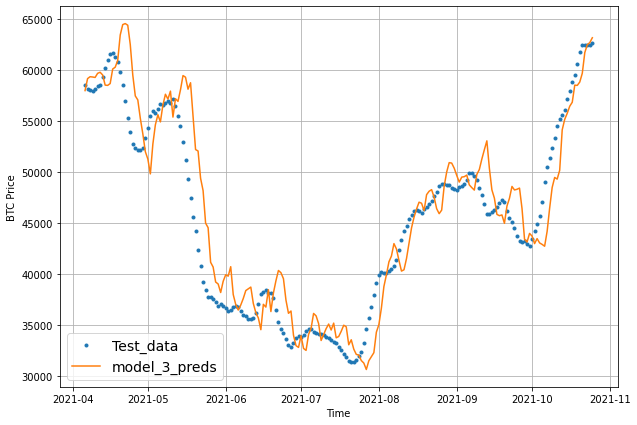

In [ ]:
# There's not actually a way to visualize this because of the 7 day window, but here's one way to look at it
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(test_labels, axis=1), start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), start=offset, format="-", label="model_3_preds")

# Comparing our models so far

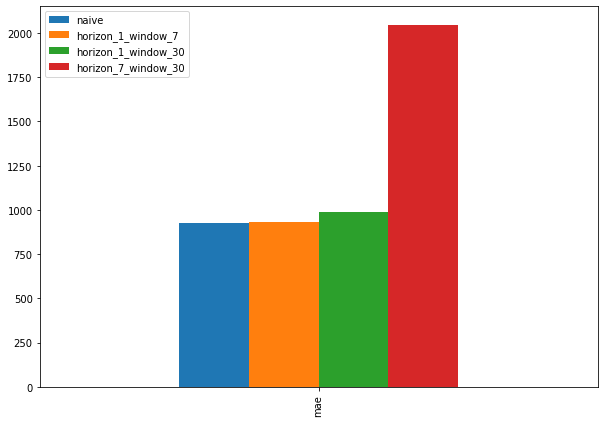

In [ ]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

So why does naive model do so well?

Because of **autocorrelation** in the data. The value at t+1 is typically pretty close to value at t


https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424

# Model 4: Conv 1D model

In [ ]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [ ]:
# Create windowed dataset
full_windows, full_labels = make_windows(np.array(prices), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2541, 2541)

In [ ]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2032, 509, 2032, 509)

We need an input shape of `(batch_size, timesteps, input_dim)`

In [ ]:
train_windows[0].shape

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer we need to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([324.71833, 332.45666, 336.585  , 346.775  , 344.81166, 343.065  ,
       358.50166])>

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works

expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[324.71832]
 [332.45667]
 [336.585  ]
 [346.775  ]
 [344.81165]
 [343.065  ]
 [358.50165]]


In [ ]:
# Create Conv1D
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  expand_dims_layer,
  layers.Conv1D(filters=128, kernel_size=5, padding='causal', activation='relu'), # causal makes sure it learns in the correct temporal order
  layers.Dense(HORIZON)
], name='model_4_conv')

model_4.compile(loss='mae',
                metrics=['mae'],
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows, train_labels,
            epochs=100,
            batch_size=32,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments/model_4_conv/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv/assets
INFO:tensorflow:Assets written to: model_experiment

## Evaluate

In [ ]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv/")
model_4.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 4ms/step - loss: 923.6509 - mae: 923.6509


[923.6509399414062, 923.6509399414062]

In [ ]:
# Get forecast predictions
model_4_preds = make_preds(model_4,
                           input_data=test_windows)

In [ ]:
test_labels.shape, model_4_preds.shape

((509, 1), TensorShape([509]))

In [ ]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_4_preds)
model_4_results

{'mae': 923.6509,
 'mape': 2.604802,
 'mase': 0.99763596,
 'mse': 2076426.5,
 'rmse': 1440.9811}

In [ ]:
naive_results

{'mae': 924.30414,
 'mape': 2.6047938,
 'mase': 0.99834156,
 'mse': 2055079.2,
 'rmse': 1433.5548}

# Model 5: LSTM model

In [ ]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [ ]:
# Create windowed dataset
full_windows, full_labels = make_windows(np.array(prices), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2541, 2541)

In [ ]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2032, 509, 2032, 509)

In [ ]:
# Create LSTM model
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

model_5.compile(loss='mae',
                metrics=['mae'],
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows, train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


## Evaluate

In [ ]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 4ms/step - loss: 998.5007 - mae: 998.5007


[998.500732421875, 998.500732421875]

In [ ]:
# Get forecast predictions
model_5_preds = make_preds(model_5,
                           input_data=test_windows)

In [ ]:
test_labels.shape, model_5_preds.shape

((509, 1), TensorShape([509]))

In [ ]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_5_preds)
model_5_results

{'mae': 998.50073,
 'mape': 2.8254218,
 'mase': 1.0784813,
 'mse': 2332680.2,
 'rmse': 1527.3114}

# Model 6: Multivariate model

I would love to add Elon Musk tweeting as an additional variable but I think that would be better for dodgecoin

Maybe could add number of tweets about bitcoin 

However, bitcoin halving seems like a strong variable to test


Sidenote: here's how to do regression with multivariate time series data: https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

In [ ]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [ ]:
bitcoin_prices.head()

,Price
Date,
2014-11-04,324.71833
2014-11-05,332.45666
2014-11-06,336.58500
2014-11-07,346.77500
2014-11-08,344.81166


In [ ]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(613, 2015)

In [ ]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2014-11-04,324.71833,25
2014-11-05,332.45666,25
2014-11-06,336.58500,25
2014-11-07,346.77500,25
2014-11-08,344.81166,25


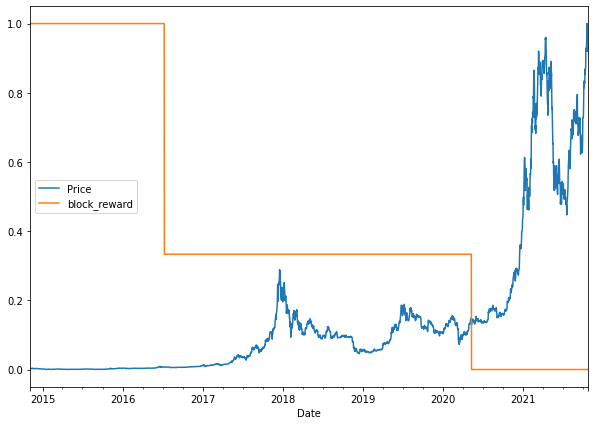

In [ ]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

### Preparing data for multivariate model

Our current functions won't work because we have two variables

Let's use `pandas.DataFrame.shift()`

In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-11-04,324.71833,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-05,332.45666,25,324.71833,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-06,336.58500,25,332.45666,324.71833,NaN,NaN,NaN,NaN,NaN
2014-11-07,346.77500,25,336.58500,332.45666,324.71833,NaN,NaN,NaN,NaN
2014-11-08,344.81166,25,346.77500,336.58500,332.45666,324.71833,NaN,NaN,NaN
2014-11-09,343.06500,25,344.81166,346.77500,336.58500,332.45666,324.71833,NaN,NaN
2014-11-10,358.50166,25,343.06500,344.81166,346.77500,336.58500,332.45666,324.71833,NaN
2014-11-11,368.07666,25,358.50166,343.06500,344.81166,346.77500,336.58500,332.45666,324.71833
2014-11-12,376.99666,25,368.07666,358.50166,343.06500,344.81166,346.77500,336.58500,332.45666


Yay now we can have data like this:

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1 ,2 ,3, 4, 5, 6, 7, block_reward] -> [8]
```

In [ ]:
# Create X (windows) and y(horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-11-11,25.0,358.501648,343.065002,344.811646,346.774994,336.584991,332.456665,324.718323
2014-11-12,25.0,368.076660,358.501648,343.065002,344.811646,346.774994,336.584991,332.456665
2014-11-13,25.0,376.996674,368.076660,358.501648,343.065002,344.811646,346.774994,336.584991
2014-11-14,25.0,442.106659,376.996674,368.076660,358.501648,343.065002,344.811646,346.774994
2014-11-15,25.0,389.003326,442.106659,376.996674,368.076660,358.501648,343.065002,344.811646


This looks like a basic setup for a regression model!

In [ ]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2032, 2032, 509, 509)

### Creating model

In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


## Evaluate

In [ ]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate/")
model_6.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 922.8585


922.8585205078125

In [ ]:
# Get forecast predictions
model_6_preds = make_preds(model_6,
                           input_data=X_test)

In [ ]:
y_test.shape, model_6_preds.shape

((509,), TensorShape([509]))

In [ ]:
model_6_results = evaluate_preds(y_true=y_test, y_pred=model_6_preds)
model_6_results

{'mae': 922.85846,
 'mape': 2.6030893,
 'mase': 0.9967801,
 'mse': 2067919.0,
 'rmse': 1438.0261}

In [ ]:
naive_results

{'mae': 924.30414,
 'mape': 2.6047938,
 'mase': 0.99834156,
 'mse': 2055079.2,
 'rmse': 1433.5548}

# Model 7: N-BEATS algorithm

Let's build the biggest model based on 2020's state-of-the-art [N-BEATS model](https://arxiv.org/pdf/1905.10437.pdf)

Let's see how it performs!

### Building and testing the 'Block Input' Layer

It doesn't exist in TF so we need to create it: https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [ ]:
# Create NBeatBlock custom layer

class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # **kwargs has the tf.keras.layers arguments such as name
    super().__init__(**kwargs)
    self.input_size = input_size # WINDOW_SIZE
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
    # Output of block is theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

    # Output the backcast and forecast from the theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon]
    return backcast, forecast

Let's test this class

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       n_neurons = 128,
                                       horizon=HORIZON,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.4634872   0.10944451 -0.4335534   0.93602407 -0.35703534 -0.17927621
 -0.34048355]
Forecast: -0.4397900700569153


So far so good

## Data Pipeline

Using `tf.data`: https://www.tensorflow.org/guide/data_performance

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create NBEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2014-11-04,324.71833
2014-11-05,332.45666
2014-11-06,336.58500
2014-11-07,346.77500
2014-11-08,344.81166


In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-11-04,324.71833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-05,332.45666,324.71833,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-06,336.58500,332.45666,324.71833,NaN,NaN,NaN,NaN,NaN
2014-11-07,346.77500,336.58500,332.45666,324.71833,NaN,NaN,NaN,NaN
2014-11-08,344.81166,346.77500,336.58500,332.45666,324.71833,NaN,NaN,NaN


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2032, 2032, 509, 509)

In [ ]:
# Time to use tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024 # see paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

## Hyperparameters for the model

See table 18 in the paper (we are doing N-BEATS-G)

In [ ]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4 # they used 4 layers in figure 1
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON # backcast + forecast

INPUT_SIZE, THETA_SIZE

(7, 8)

## Preparing for Residual Connections (see the diagram with the stacks)

The N-BEATS algorithm uses double residual stacking (3.2) because the architecture is pretty deep (vanishing gradient issues in deep models)

See https://paperswithcode.com/method/resnet

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

In [ ]:
subtracted = layers.subtract([tensor_1, tensor_2])

added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


## Building, Compiling, and Fitting N-BEATS

1. Setup an instance of the N-BEATS block layer (this will be first block, and then will set up a loop to create stacks)
2. Create an input layer for the N-BEATS stack (using Functional API)
3. Make the initial backcast and forecast for the model using (1.)
4. Use for loop to create stacks of block layers
5. Use the `NBeatsBlock` class within the for loop in (4.) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together in `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to be consistent) and Adam optimizer (paper used it)
9. Fit the N-BEATS for 5000 epochs and use some callbacks:
  * Early Stopping
  * Reduce LR on plateau

In [ ]:
# 1.
nbeats_initial_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=THETA_SIZE, # backcast + forecast
                                       n_neurons = N_NEURONS,
                                       horizon=HORIZON,
                                       n_layers=N_LAYERS,
                                       name='InitialBlock')

nbeats_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=THETA_SIZE, # backcast + forecast
                                       n_neurons = N_NEURONS,
                                       horizon=HORIZON,
                                       n_layers=N_LAYERS,
                                       name='Block')

In [ ]:
# Rough draft

# tf.random.set_seed(42)
# from tensorflow.keras import layers

# # 2.
# inputs = layers.Input(shape=(INPUT_SIZE), name='input layer')
# # 3. 
# backcast, forecast = nbeats_initial_layer(inputs)


# stack = [nbeats_layer for _ in range(N_STACKS-1)]

# all_forecast = forecast
# for block in stack:
#   inputs = tf.subtract(inputs, backcast, name='subtract')
#   backcast, forecast = block(inputs)
#   all_forecast = tf.add(all_forecast, forecast)




In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174 
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 00246: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00346: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 1min 50s, sys: 2.65 s, total: 1min 53s
Wall time: 2min 23s


In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)

# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 952.4994,
 'mape': 2.6837056,
 'mase': 1.0287952,
 'mse': 2230253.8,
 'rmse': 1493.4036}

In [ ]:
# compare to model_1_results
model_1_results

{'mae': 933.08374,
 'mape': 2.6302116,
 'mase': 1.0078244,
 'mse': 2106266.2,
 'rmse': 1451.2981}

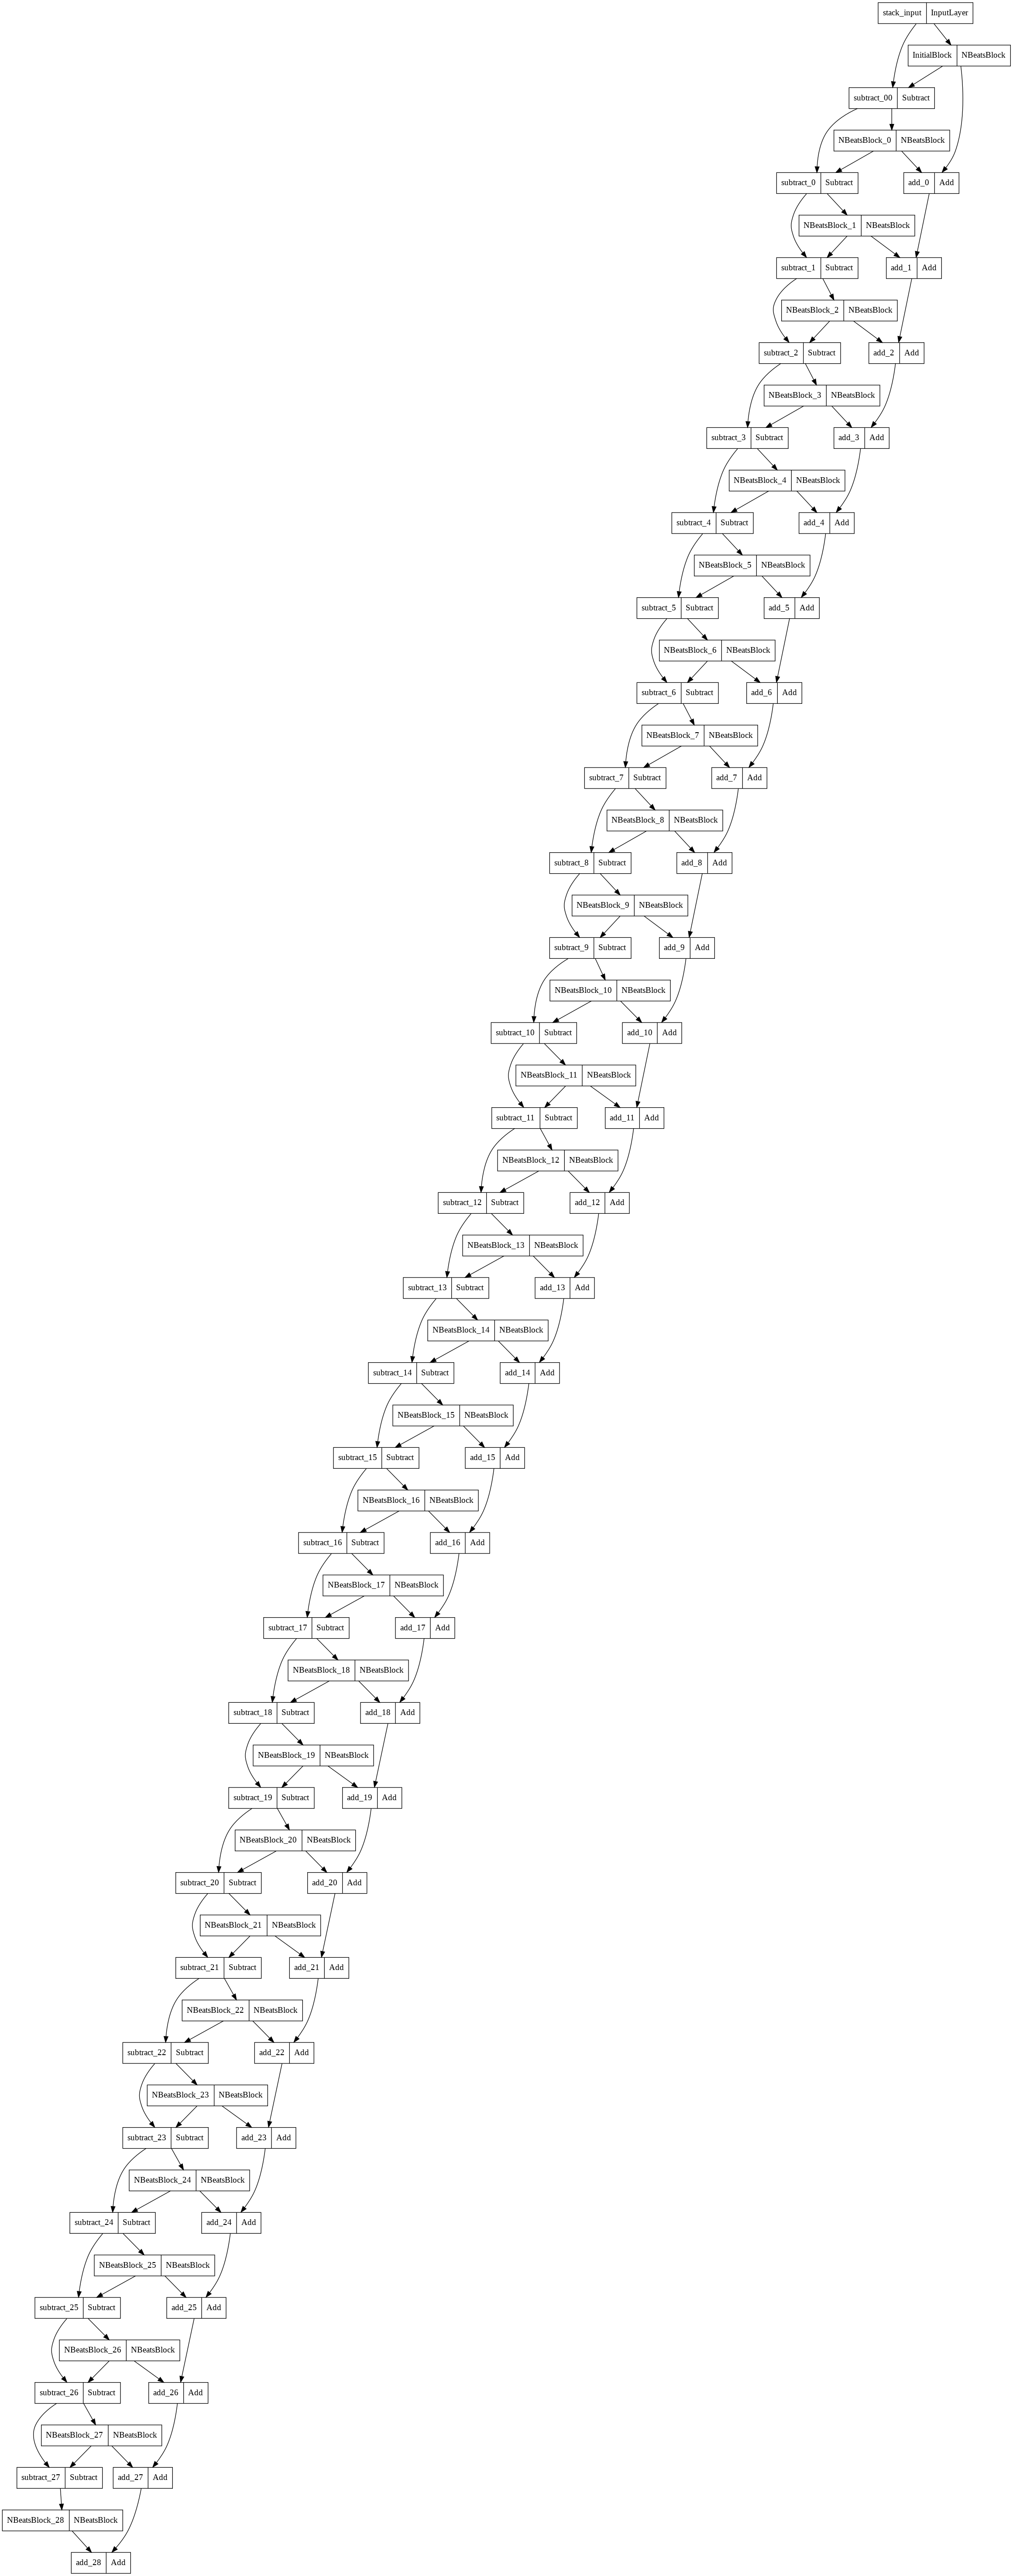

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

# Model 8: Creating an Ensemble

An ensemble leverages the wisdom of the crowd effect

It combines many _different_ models to predict a common goal

In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

In [ ]:
## Constructing and fitting multiple models

def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fn=['mae','mse','mape']):
  """
  Returns a list of num_iter models each trained on MAE, MSE, and MAPE loss
  
  For example, if num_iter = 10 it'll return 30 models
  """  

  ensemble_models = []

  for i in range(num_iter):
    # Build and fit a new model with different loss function
    for loss_function in loss_fn:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs}, model number {i}")

      # construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # using he_normal for prediction intervals later
        layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
        layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
        layers.Dense(HORIZON)
      ])

      # Compile simple model
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae','mse'])
      
      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                patience=100,
                                                                verbose=1)])
      
      ensemble_models.append(model)
  return ensemble_models

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000, model number 0
Optimizing model by reducing: mse for 1000, model number 0

Epoch 00641: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00741: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000, model number 0

Epoch 00129: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mae for 1000, model number 1
Optimizing model by reducing: mse for 1000, model number 1

Epoch 00424: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00524: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000, model number 1

Epoch 00539: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00661: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000, model number 2

Epoch 0072

In [ ]:
len(ensemble_models)

15

In [ ]:
ensemble_models

## Make predictions with ensemble model

In [ ]:
# Create a function to return a list of predictions

def make_ensemble_preds(ensemble_models,data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
%%time 
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)

CPU times: user 1.09 s, sys: 55.1 ms, total: 1.14 s
Wall time: 1.13 s


In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_preds)
ensemble_results

{'mae': 941.8538,
 'mape': 2.6583095,
 'mase': 1.017297,
 'mse': 2135938.8,
 'rmse': 1461.3636}

In [ ]:
# Or we can do this
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=tf.reduce_mean(ensemble_preds, axis=0))
ensemble_results

{'mae': 924.18054,
 'mape': 2.6091447,
 'mase': 0.99820805,
 'mse': 2087776.1,
 'rmse': 1444.914}

In [ ]:
# Or we can do this - median performed best here!
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0))
ensemble_results

{'mae': 922.4596,
 'mape': 2.603472,
 'mase': 0.9963493,
 'mse': 2083582.8,
 'rmse': 1443.462}

In [ ]:
# Performed better than model_1! 
model_1_results

{'mae': 933.08374,
 'mape': 2.6302116,
 'mase': 1.0078244,
 'mse': 2106266.2,
 'rmse': 1451.2981}

## Plotting the prediction intervals

One benefit of using an ensemble is the ability to get prediction intervals

Bootstrap method:

1. Take the predictions from a number of randomly initialized models (ensemble models)
2. Measure the standard deviation of the predictions
3. Mulitiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3.) to the mean/median of the predictions made in (1.)

See: https://eng.uber.com/neural-networks-uncertainty-estimation/

In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks
  
  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)
  
  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96 

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95% 
lower, upper = get_upper_lower(preds=ensemble_preds)

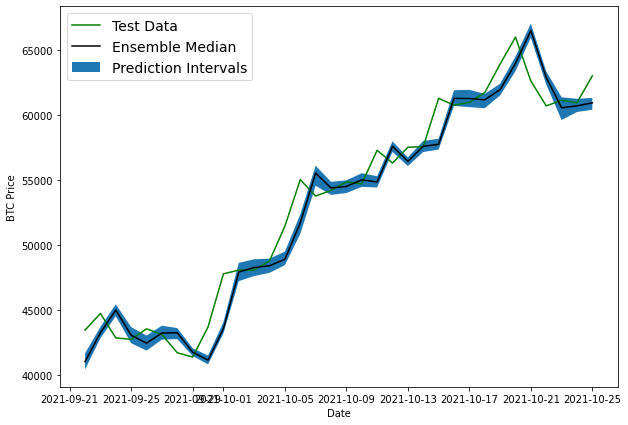

In [ ]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=475
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

So far all the models predictions are lagging behind the test data, essentially doing the same thing as the naive model - predicting the prev timestep as the next timestep

Potential Problems:

* Overfitting
* Model might be copying the naive model
* Data isn't predictable (I believe this is the main problem)


Note: the prediction intervals were made assuming the model's data is normally distributed



# Model 9 - predicting into the future by training on full data

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-11-04,324.71833,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-05,332.45666,25,324.71833,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-06,336.58500,25,332.45666,324.71833,NaN,NaN,NaN,NaN,NaN
2014-11-07,346.77500,25,336.58500,332.45666,324.71833,NaN,NaN,NaN,NaN
2014-11-08,344.81166,25,346.77500,336.58500,332.45666,324.71833,NaN,NaN,NaN


In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(['Price', 'block_reward'], axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()['Price'].to_numpy()

len(X_all), len(y_all)

(2541, 2541)

In [ ]:
# Turn data into efficient running tensors
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>

In [ ]:
tf.random.set_seed(42)

# create simple model
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(HORIZON)
], name='model_9_future_model')

model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

model_9.fit(dataset_all,
            epochs = 100,
            verbose=0)

## Make predictions into the future

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14

To make predictions into the future we want a function which:

1. Takes as an input:

* a list of values (Bitcoin historical)
* a trained model
* a window into the future to predict (`INTO_FUTURE`)
* window size a model was trained (`WINDOW_SIZE`)

2. Creates an empty list for future forecasts which we will fill up and extracts the last `WINDOW SIZE` values from the input values

3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction

In [ ]:
def make_forecast(data, model, into_future, window_size):
  forecasts = []
  inputs = data[-window_size:]

  for i in range(0, into_future):
    pred = model.predict(tf.data.Dataset.from_tensor_slices(inputs.reshape((1,7))).batch(BATCH_SIZE))
    print(f"Predicting on: \n {inputs} -> Prediction: {pred[0][0]}\n")
    forecasts.append(pred[0][0])
    inputs = np.append(inputs, pred)
    inputs = inputs[-window_size:]
  
  return forecasts

In [ ]:
make_forecast(y_all, model_9, INTO_FUTURE, WINDOW_SIZE)

Predicting on: 
 [63901.07308021 65972.86312976 62603.57506991 60689.23826486
 61124.34712562 60936.15085142 63004.38111467] -> Prediction: 64438.8203125

Predicting on: 
 [65972.86312976 62603.57506991 60689.23826486 61124.34712562
 60936.15085142 63004.38111467 64438.8203125 ] -> Prediction: 63827.90625

Predicting on: 
 [62603.57506991 60689.23826486 61124.34712562 60936.15085142
 63004.38111467 64438.8203125  63827.90625   ] -> Prediction: 61270.8984375

Predicting on: 
 [60689.23826486 61124.34712562 60936.15085142 63004.38111467
 64438.8203125  63827.90625    61270.8984375 ] -> Prediction: 60892.890625

Predicting on: 
 [61124.34712562 60936.15085142 63004.38111467 64438.8203125
 63827.90625    61270.8984375  60892.890625  ] -> Prediction: 61533.6796875

Predicting on: 
 [60936.15085142 63004.38111467 64438.8203125  63827.90625
 61270.8984375  60892.890625   61533.6796875 ] -> Prediction: 62313.30859375

Predicting on: 
 [63004.38111467 64438.8203125  63827.90625    61270.8984375

[64438.82,
 63827.906,
 61270.9,
 60892.89,
 61533.68,
 62313.31,
 63516.152,
 63653.13,
 62261.992,
 61014.316,
 61434.4,
 62239.453,
 62905.965,
 63236.15]

In [ ]:
future_forecast = make_forecast(y_all, model_9, INTO_FUTURE, WINDOW_SIZE)

Predicting on: 
 [63901.07308021 65972.86312976 62603.57506991 60689.23826486
 61124.34712562 60936.15085142 63004.38111467] -> Prediction: 64438.8203125

Predicting on: 
 [65972.86312976 62603.57506991 60689.23826486 61124.34712562
 60936.15085142 63004.38111467 64438.8203125 ] -> Prediction: 63827.90625

Predicting on: 
 [62603.57506991 60689.23826486 61124.34712562 60936.15085142
 63004.38111467 64438.8203125  63827.90625   ] -> Prediction: 61270.8984375

Predicting on: 
 [60689.23826486 61124.34712562 60936.15085142 63004.38111467
 64438.8203125  63827.90625    61270.8984375 ] -> Prediction: 60892.890625

Predicting on: 
 [61124.34712562 60936.15085142 63004.38111467 64438.8203125
 63827.90625    61270.8984375  60892.890625  ] -> Prediction: 61533.6796875

Predicting on: 
 [60936.15085142 63004.38111467 64438.8203125  63827.90625
 61270.8984375  60892.890625   61533.6796875 ] -> Prediction: 62313.30859375

Predicting on: 
 [63004.38111467 64438.8203125  63827.90625    61270.8984375

## Plotting the predictions into the future

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [ ]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-10-25 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, 

                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29',
       '2021-10-30', '2021-10-31', '2021-11-01', '2021-11-02',
       '2021-11-03', '2021-11-04', '2021-11-05', '2021-11-06',
       '2021-11-07', '2021-11-08'], dtype='datetime64[D]')

In [ ]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, prices[-1])
next_time_steps, future_forecast

(array(['2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28',
        '2021-10-29', '2021-10-30', '2021-10-31', '2021-11-01',
        '2021-11-02', '2021-11-03', '2021-11-04', '2021-11-05',
        '2021-11-06', '2021-11-07', '2021-11-08'], dtype='datetime64[D]'),
 array([63004.383, 64438.82 , 63827.906, 61270.9  , 60892.89 , 61533.68 ,
        62313.31 , 63516.152, 63653.13 , 62261.992, 61014.316, 61434.4  ,
        62239.453, 62905.965, 63236.15 ], dtype=float32))

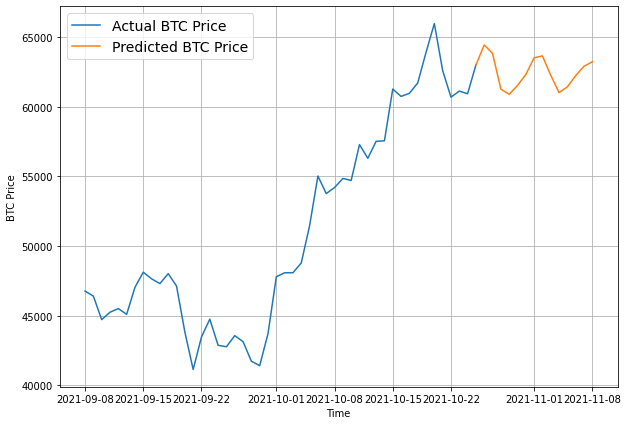

In [ ]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, prices, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

# Model 10 - turkey data

Showing why forecasting is BS

One single unpredictable datapoint can ruin everything

In [ ]:
# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = prices.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
# Manufacture an extra price on the end (to showcase the Turkey problem)
btc_price_turkey[-10:]

[60744.9849380446,
 60965.4654336171,
 61707.4813118213,
 63901.0730802098,
 65972.8631297649,
 62603.5750699116,
 60689.2382648626,
 61124.3471256221,
 60936.1508514192,
 630.043811146675]

In [ ]:
# Get the timesteps for the turkey problem 
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-10-16T00:00:00.000000000', '2021-10-17T00:00:00.000000000',
       '2021-10-18T00:00:00.000000000', '2021-10-19T00:00:00.000000000',
       '2021-10-20T00:00:00.000000000', '2021-10-21T00:00:00.000000000',
       '2021-10-22T00:00:00.000000000', '2021-10-23T00:00:00.000000000',
       '2021-10-24T00:00:00.000000000', '2021-10-25T00:00:00.000000000'],
      dtype='datetime64[ns]')

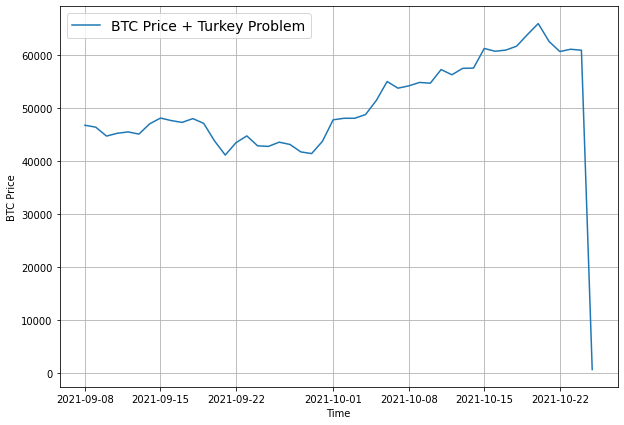

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey, 
                 values=btc_price_turkey, 
                 format="-", 
                 label="BTC Price + Turkey Problem", 
                 start=2500)

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2032, 509, 2032, 509)

In [ ]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


In [ ]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 3ms/step - loss: 1034.4946


1034.49462890625

In [ ]:
# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([9660.122, 9827.668, 9672.227, 9759.875, 9710.475, 9807.82 ,
       9819.334, 9879.259, 9335.341, 9451.662], dtype=float32)>

In [ ]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 20278.744,
 'mape': 108.450264,
 'mase': 19.489779,
 'mse': 633565600.0,
 'rmse': 24717.24}

And with just one value change, our error metrics go through the roof.

To make sure, let's remind ourselves of how model_1 went on unmodified Bitcoin data (no turkey problem).

In [ ]:
# Comparing to model 1
model_1_results

{'mae': 933.08374,
 'mape': 2.6302116,
 'mase': 1.0078244,
 'mse': 2106266.2,
 'rmse': 1451.2981}

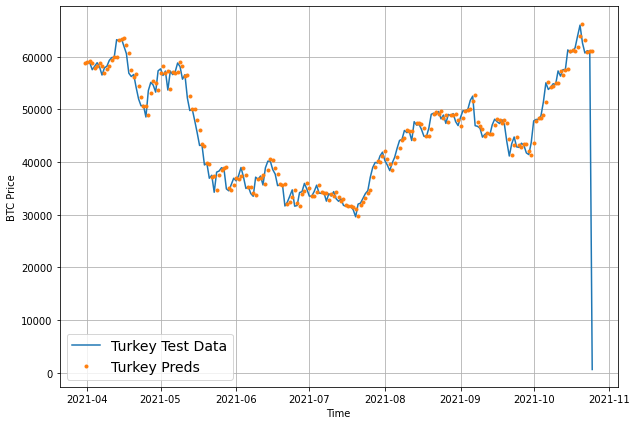

In [ ]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):], 
                 values=btc_price_turkey[-len(y_test):], 
                 format="-", 
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds, 
                 label="Turkey Preds", 
                 start=offset);

Highly unlikely price movements (based on historical movements), upward or downward will likely never be part of a forecast.

However, as we've seen, despite their unlikeliness, these events can happen and will have huuuuuuuuge impacts to the performance of our models.

# Comparing the models

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,924.304138,2.055079e+06,1433.554810,2.604794,0.998342
model_1_dense_w7_h1,933.083740,2.106266e+06,1451.298096,2.630212,1.007824
model_2_dense_w30_h1,990.399170,2.314996e+06,1521.510986,2.788899,1.059855
model_3_dense_w30_h7,2047.885620,1.015826e+07,2338.837646,5.766706,2.206674
model_4_CONV1D,923.650879,2.076426e+06,1440.981079,2.604802,0.997636
model_5_LSTM,998.500732,2.332680e+06,1527.311401,2.825422,1.078481
model_6_multivariate,922.858459,2.067919e+06,1438.026123,2.603089,0.996780
model_8_NBEATs,952.499390,2.230254e+06,1493.403564,2.683706,1.028795
model_9_ensemble,922.459595,2.083583e+06,1443.462036,2.603472,0.996349
model_10_turkey,20278.744141,6.335656e+08,24717.240234,108.450264,19.489779


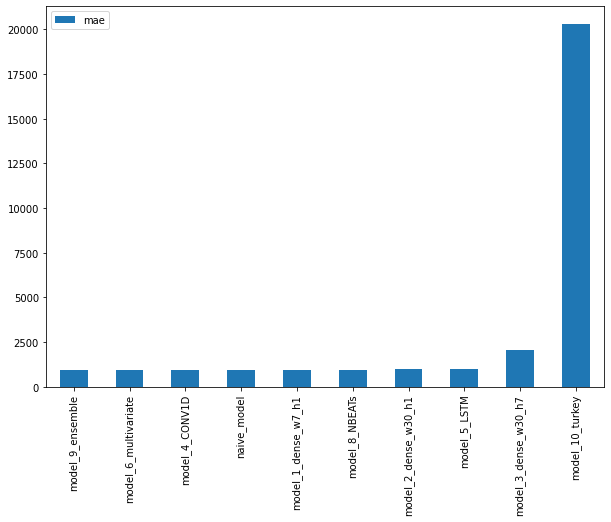

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");